<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter06_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **비지도 학습**

비지도 학습은 타깃이 없고, 특성 데이터만 있을 때 사용하는 머신러닝 알고리즘이다.

대표적인 비지도학습으로 군집 알고리즘과 차원축소가 있다.

In [23]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-09-30 09:42:35--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-09-30 09:42:35--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-09-30 09:42:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

코랩의 코드 셀에서 '!' 문자로 시작하면 코랩은 이후 명령을 파이썬 코드가 아닌 리눅스 셸(shell) 명령으로 이해한다.

wget 명령은 원격 주소에서 데이터를 다운로드하여 저장한다.

-O 옵션에서 저장할 파일 이름을 지정할 수 있다.

---

과일 데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진이다.

이 데이터는 넘파이 배열의 기본 저장 포맷인 npy파일로 저장되어 있다.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
fruits = np.load('fruits_300.npy')

넘파이에서 npy파일을 로드하는 방법은 load()메소드에 파일 이름을 전달하면 된다.

반대로 넘파이에서 npy파일을 저장하는 방법은 save()메소드에 파일 이름을 전달하면 된다.

In [26]:
print(fruits.shape)

(300, 100, 100)


첫 번째 차원은 300으로 샘플의 개수, 두 번째 차원은 100으로 이미지 높이, 세 번째 차원은 100으로 이미지 너비이다.

이 데이터는 100x100크기의 흑백이미지로 300개가 있다.

In [27]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 샘플(이미지)의 첫 번째 행을 모든 열을 출력했다.

처음 2개의 인덱스를 0으로 지정하고 마지막 인덱스를 지정하지 않거나 슬라이싱 연산자를 쓰면 된다.

---

첫 번째 행에 있는 픽셀 100개의 값을 출력했다. 

이 넘파이 배열은 흑백 이미지이므로 0~255까지의 정숫값을 가진다.

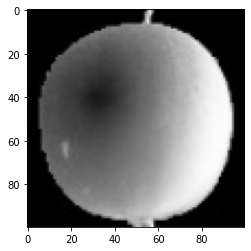

In [28]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

맷플롯립의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를, 즉 넘파이 배열에 저장된 값을 이미지로 출력할 수 있다.

기본적으로 맷플롯립은 cmap이라는 매개변수로 사용할 컬러의 스케일(종류)을 지정해줄 수 있다.

default값은 viridis으로 넘파이 배열에 있는 픽셀값을 밝은 노랑에서 약간 녹색의 스케일로 출력해준다.

예제에서 사용하는 데이터는 흑백 이미지이므로 cmap 매개변수를 'gray'로 지정해서 회색조로 이미지를 출력했다. 

---

첫 번째 이미지는 사과로 확인할 수 있다.

이미지처럼 첫 번째 행이 위에서 출력한 배열 값에 해당한다.

0에 가까울수록 검게 나타나고 높은 값은 밝게 표시된다.

※ 여기서 잠깐 ※

보통 흑백 이미지는 바탕이 밝고 물체가 짙은 색이다. 그런데 왜 위의 이미지처럼 보인 것일까?

사실 이 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것이다.

사진의 흰 바탕(높은 값)은 검은색(낮은 값)으로 만들고 실제 사과가 있어 짙은 부분(낮은 값)은 밝은색(높은 값)으로 바꾸었다.

우리의 관심 대상은 바탕이 아니라 사과이다. 

흰색 바탕은 우리에게 중요하지 않지만 컴퓨터는 255에 가까운 바탕에 집중한다.

따라서 바탕을 검게 만들고 사진에 짙게 나온 사과를 밝은색으로 만들었다.

컴퓨터가 255에 가까운 바탕에 집중하는 이유는 알고리즘이 어떤 출력을 만들 기 위해 곱셉, 덧셈을 하는데 픽셀값이 0이면 출력도 0이 되어 의미가 없어진다. 근데 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋다.

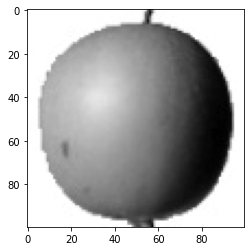

In [29]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

관심 대상의 영역을 높은 값으로 바꾸었지만 맷플롯립을 출력할 때 바탕이 검게 나온다. 우리가 알던 흑백 이미지아니다. 

우리 눈에 보기 좋은 흑백 이미지로 보려면 cmap 매개변수를 'gray_r'로 지정하여 다시 반전시켜 출력한다.

---

반전시켜서 출력했으므로 위의 그림은 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이라는 것을 명심해야한다.

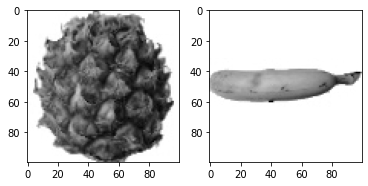

In [30]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

이 데이터는 사과, 바나나, 파인애플이 각각 100개씩 들어가있다.

맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 도와준다.

subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정한다.

여기에서는 행 1개, 열 2개로 지정했다.

---

반환된 axs는 2개의 서브 그래플 담고 있는 배열이다.

# **샘플 차원 변경하기**

In [31]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [32]:
print(apple.shape)

(100, 10000)


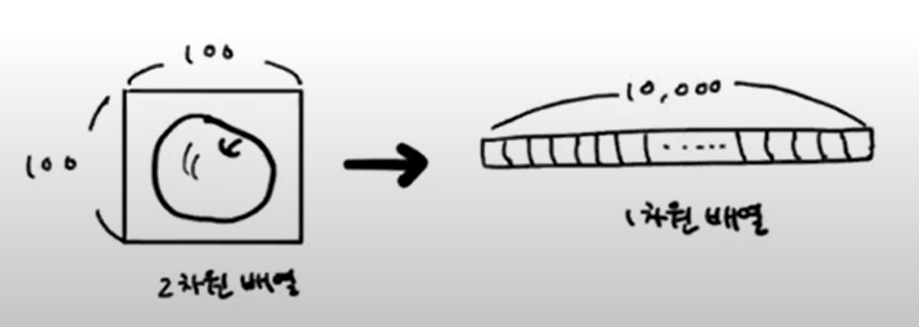

fruits 데이터를 사과, 파인애플, 바나나로 나눌 것이다.

frutis 데이터에는 순서대로 사과 100개, 파인애플 100개, 바나나 100개가 있다.

frutis 배열에서 순서대로 100개씩 선택하기 위해 첫번째 차원만 슬라이싱을 사용하였다.

그리고 넘파이 배열을 나눌 때 100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들어주기 위해 reshape()메소드를 사용해서 첫 번째 차원을 -1로 지정하여 자동으로 남은 차원을 할당하고, 두 번째 차원과 세 번째 차원을 합쳤다. 

---

행에는 샘플이 있고, 열에는 픽셀이 있는 2차원 배열을 생성했다. 

각 배열의 크기는 (100, 10000)이다.

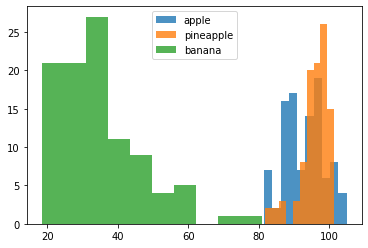

In [33]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

각 배열에 들어 있는 샘플의 픽셀 평균값을 계산해보자.

평균값을 비교해보면 분류가 가능하지않을까 기대해본다.

---

각 샘플은 행, 픽셀값은 열에 있다. 

그러므로 넘파이의 mean()메소드에 axis=1로 지정하여 샘플의 픽셀 평균값을 계산한다.

---

히스토그램을 그려보면 평균값이 어떻게 분포되어 있는지 확인할 수 있다.

맷플롯립의 hist()함수를 사용하면 히스토그램을 그릴 수 있다.

사과, 파인애플, 바나나를 하나의 그래프에 그리면 겹쳐질 것이다.

그래서 조금 투명하게 설정해서 겹친 부분을 잘 보이게해야한다.

맷플롯립의 alpha 매개변수를 1보다 작게하면 투명도를 줄 수 있다.

맷플롯립의 legend()함수를 사용하면 범례를 만들 수 있다.

**※ 여기서 잠깐 ※**

히스토그램은 값이 발생한 빈도를 그래프로 표시한 것이다.

보통 x축이 값의 구간(계급)이고, y축은 발생 빈도(도수)이다.

---

히스토그램을 보면 바나나 사진의 평균값은 40아래에 집중되어 있다.

사과와 파인애플은 90 ~ 100 사이에 모여있다.

바나나는 각 샘플의 픽셀 평균값만으로 사과나 파인애플과 확실히 구분이 된다.

바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작다.

반면 사과와 파인애플은 많이 겹쳐져있어서 샘플의 픽셀평균값만으로는 구분하기 어렵다.

사과나 파인애플은 대체로 형태가 동그랗고 사진에서 차지하는 크기도 비슷하기 때문이다.

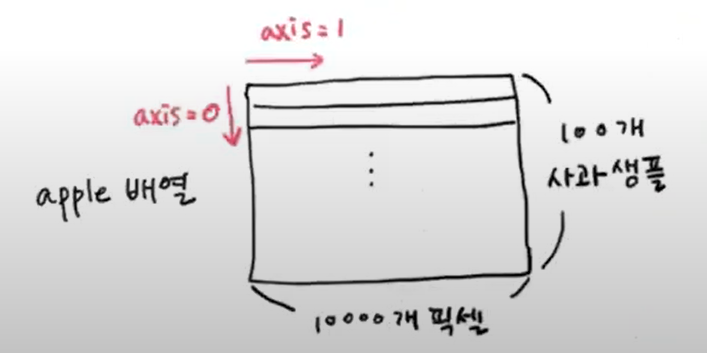

axis는 배열의 '축'을 의미한다.

2차원 배열에서 axis=1일 때는 열 방향을 계산하고, axis=0일 때는 행 방향으로 계산한다.

만약 axis=0으로 지정하면 10000개의 픽셀의 평균이 나올 것이고, axis=1로 지정하면 100개의 샘플 평균이 나올 것이다.

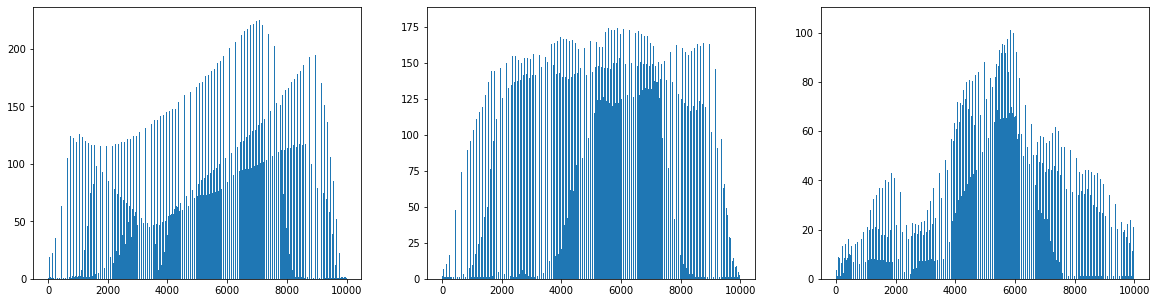

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

샘플의 픽셀평균값으로는 사과, 파인애플, 바나나를 구분하기는 쉽지 않다.

그래서 생각한 방법이 픽셀별 평균값으로 비교해보는 것이다.

넘파이의 mean()메소드에 axis=0을 지정하여 각 픽셀의 평균값을 계산한다.

---

이번에는 맷플롯립의 bar()함수를 사용해 픽셀 10,000개에 대해 평균값을 subplot() 함수로 3개의 서브 그래프를 만들어서 사과, 파인애플, 바나나에 대한 막대그래프를 그렸다.

x축은 픽셀으로, y축은 각 픽셀의 평균값으로 막대그래프를 그렸다.

x축은 픽셀이므로 0 ~ 10,000까지 range()함수로 간단하게 설정했다.

y축은 각 픽셀의 평균값이므로 np.mean() 메소드의 결과로 설정했다.

---

과일마다 값이 높은 구간이 서로 다르다.

사과는 사진 아래쪽으로 갈수록 값이 높아진다.

파인애플은 비교적 고르면서 높다.

바나나는 확실히 중앙의 픽셀값이 높다.

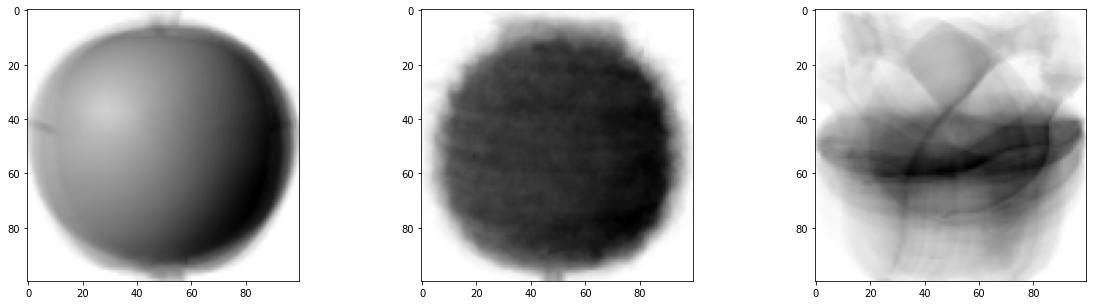

In [35]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

10,000개의 픽셀의 평균값이므로 100x100 크기로 바꿔서 이미지처럼 출력할 수 있다.

각 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있다.

세 과일은 픽셀 위치에 따라 값의 크기가 차이난다.

따라서 이 대표 이미지와 어떤 이미지의 픽셀 간 차이를 구해서 가까운 사진을 골라낸다면 사과, 파인애플, 바나나를 분류할 수 있을 것이다.

# **평균값과 가까운 사진 고르기**

In [36]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


사과 사진의 각 픽셀별 평균값인 apple_mean과 가장 가까운 사진을 골라낼 것이다.

---

우선 fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절대값을 계산했다.

넘파이 abs()함수는 절댓값을 계산하는 함수이다. np.absolute()함수의 다른 이름이다.

이 함수에 배열을 입력하면 모든 원소의 절대값을 계산하여 입력과 동일한 크기의 배열을 반환한다.

abs_diff는 (300, 100, 100) 크기의 배열이 된다.

따라서 각 샘플에 대한 픽셀평균값을 구해야하므로 axis=(1,2)로 두 번째, 세 번째 차원을 지정해야한다.

이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 (300,)인 1차원 배열이다.

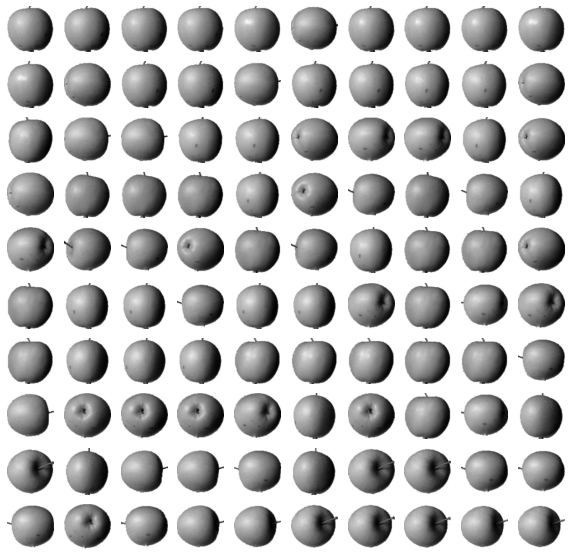

In [39]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

위에서 구한 abs_mean 배열에서 가장 작은 값이 사과 이미지와 가까운 사진이 된다.

즉, apple_mean과 오차가 가장 작은 샘플을 고르는 것이다.

문제는 어느 위치의 이미지가 사과 이미지와 가까운지 알 수 없다. 

np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환한다.

---

subplots()함수로 10 x 10, 총 100개의 서브 그래프를 만들었다.

그래프가 많기 때문에 그래프의 크기를 figsize=(10, 10)으로 조금 크게 지정했다.

맷플롯립의 figsizw의 default는 (8, 6)이다.

그다음 중첩 for반복문을 순회하면서 10개의 행과 열에 이미지를 출력했다.

axs는 (10, 10)크기의 2차원 배열이므로 i, j 두 첨자를 사용하여 서브 그래프 위치를 지정한다.

또 이미지만 그리기 위해 axis('off')를 사용하여 좌표축을 그리지 않았다.

흑백 사진에 있는 각 픽셀의 평균을 구해서 그 픽셀의 평균값과 가장 가까운 이미지를 찾아서 과일 사진을 모으는 작업을 해보았다.

이렇게 비슷한 샘플끼리 그룹을 모으는 작업을 군집(Clustering)이라고 한다.

군집 알고리즘에서 만든 그룹을 클러스터(Cluster)라고 부른다.

---

하지만 이번 예제에서는 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있었다.

즉 타깃값을 알고 있었기 때문에 사과, 파인애플, 바나나의 사진 픽셀의 평균값을 게산해서 가장 가까운 과일을 찾을 수 있었다.

실제 비지도 학습에서는 타깃값을 모르기 때문에 이처럼 샘플의 평균값을 미리 구할 수 없다.